In [2]:
library(Seurat)
library(SingleCellExperiment)

In [3]:
umi <- readRDS("completely_normalised_data.scran.combat_glm.sc3_clust.rds")

Before we start replotting our PCAs and TSNEs, let us review our data again.


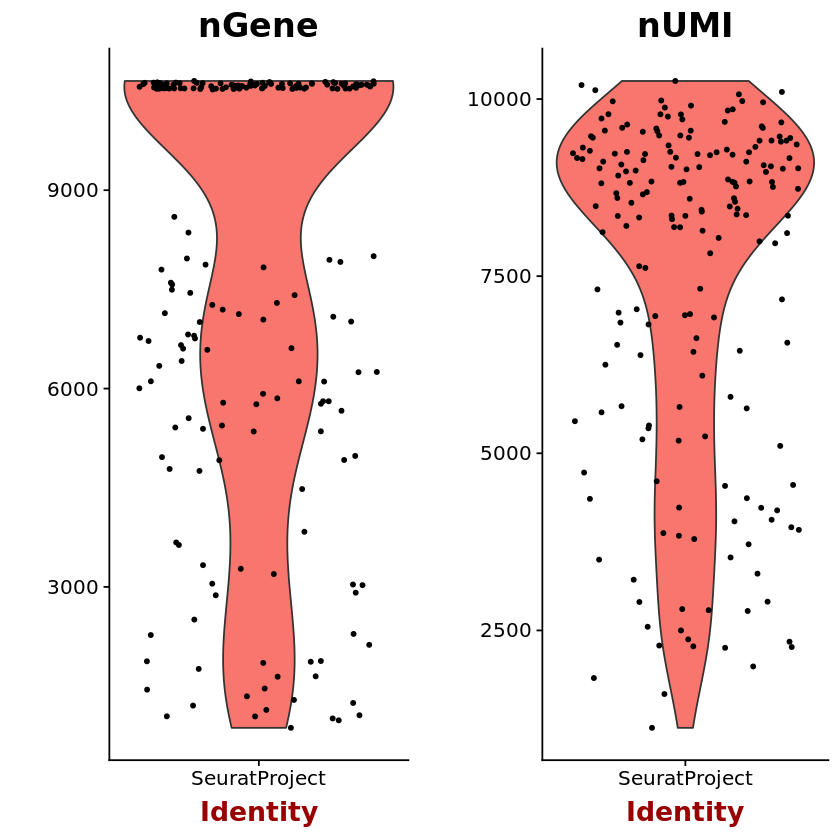

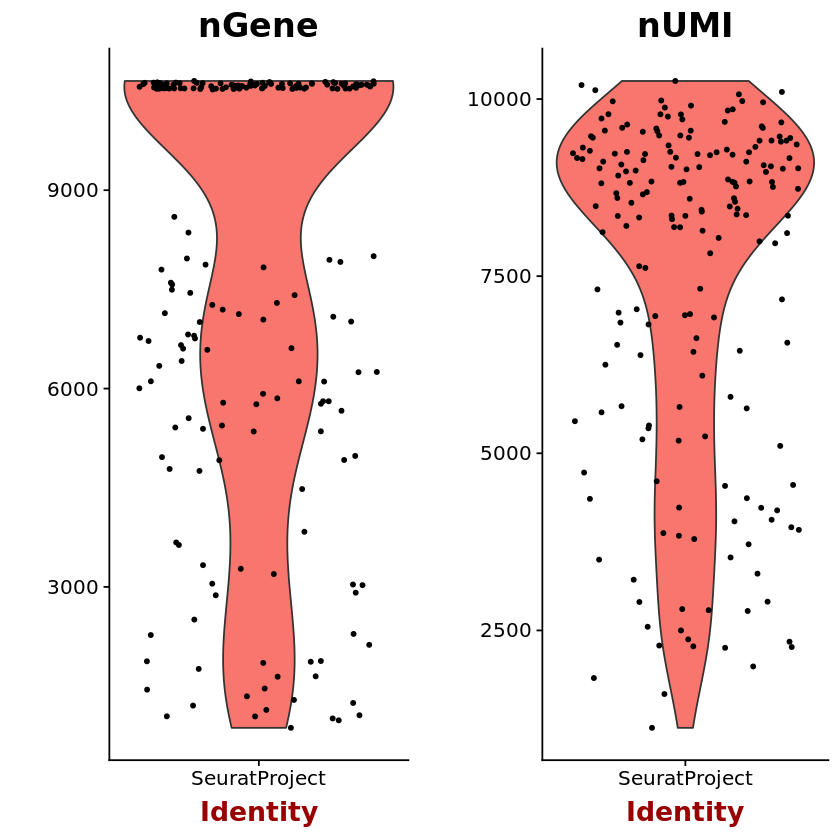

[1] 1715

The average expression and dispersion of each gene


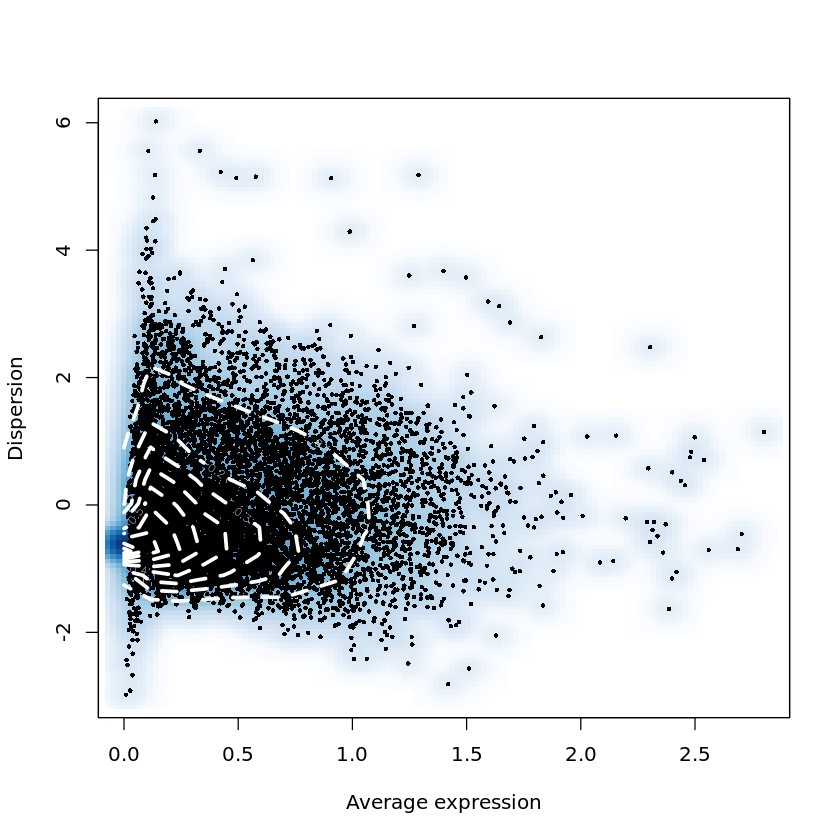

In [16]:
message("Before we start replotting our PCAs and TSNEs, let us review our data again.")

seuset_combat <- CreateSeuratObject(
    raw.data = assay(umi, "combat"),
    min.cells = 2,  # detected
    min.genes = 170
)

VlnPlot(object = seuset_combat, 
        features.plot = c("nGene", "nUMI"), 
        nCol = 2
)

#GenePlot(object = seuset_combat, 
#         gene1 = "nUMI", 
#         gene2 = "nGene"
#)

seuset.filter <- FilterCells(
    object = seuset_combat,
    subset.names = c("nUMI"),
    #low.thresholds = c(5000),
    high.thresholds = c(2e7)
)

VlnPlot(
    object = seuset.filter, 
    features.plot = c("nGene", "nUMI"), 
    nCol = 2
)

seuset.norm <- NormalizeData(
    object = seuset.filter, 
    normalization.method = "LogNormalize", 
    scale.factor = 10000
)

# HVG
seu <- FindVariableGenes(
    object = seuset.norm,
    mean.function = ExpMean, 
    dispersion.function = LogVMR, 
    x.low.cutoff = 0.0125, 
    x.high.cutoff = 3, 
    y.cutoff = 1,
    do.text = FALSE
)
length(x = seu@var.genes)
message("The average expression and dispersion of each gene")


In [17]:
# Confounders
seu <- ScaleData(
    object = seu, 
    #vars.to.regress = c("nUMI")
    #vars.to.regress = c("nUMI", "nGene")
)

#head(logcounts(seuset_combat))



[1] "Regressing out nUMI"
  |                                                                      |   0%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |=                                                                     |   1%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=                                                                     |   2%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 20)”

  |==                                                                    |   3%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |===                                                                   |   4%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 11)”

  |===                                                                   |   5%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |====                                                                  |   6%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 20)”

  |=====                                                                 |   6%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |=====                                                                 |   7%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 19)”

  |======                                                                |   8%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 27)”

  |======                                                                |   9%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 18)”

  |=======                                                               |  10%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 13)”

  |========                                                              |  11%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 21)”

  |========                                                              |  12%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 23)”

  |=========                                                             |  13%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 14)”

  |==========                                                            |  14%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |==========                                                            |  15%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 25)”

  |===========                                                           |  16%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 29)”

  |============                                                          |  17%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 28)”

  |============                                                          |  18%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |=============                                                         |  19%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 13)”

  |==============                                                        |  19%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 51)”

  |==============                                                        |  20%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |===============                                                       |  21%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 86)”

  |================                                                      |  22%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |================                                                      |  23%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |=================                                                     |  24%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 45)”

  |==================                                                    |  25%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 6)”

  |==================                                                    |  26%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 9)”

  |===================                                                   |  27%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 7)”

  |===================                                                   |  28%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 17)”

  |====================                                                  |  29%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=====================                                                 |  30%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 12)”

  |=====================                                                 |  31%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |======================                                                |  31%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 19)”

  |=======================                                               |  32%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 70)”

  |=======================                                               |  33%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 22)”

  |========================                                              |  34%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 38)”

  |=========================                                             |  35%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=========================                                             |  36%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 9)”

  |==========================                                            |  37%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 11)”

  |===========================                                           |  38%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |===========================                                           |  39%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 5)”

  |============================                                          |  40%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |=============================                                         |  41%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=============================                                         |  42%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |==============================                                        |  43%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 26)”

  |==============================                                        |  44%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 11)”

  |===============================                                       |  44%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |================================                                      |  45%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 7)”

  |================================                                      |  46%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |=================================                                     |  47%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 14)”

  |==================================                                    |  48%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |==================================                                    |  49%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |===================================                                   |  50%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 5)”

  |====================================                                  |  51%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 23)”

  |====================================                                  |  52%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |=====================================                                 |  53%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 9)”

  |======================================                                |  54%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=======================================                               |  56%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |========================================                              |  56%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 24)”

  |========================================                              |  57%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 26)”

  |=========================================                             |  58%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |=========================================                             |  59%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |==========================================                            |  60%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 18)”

  |===========================================                           |  61%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 44)”

  |===========================================                           |  62%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 9)”

  |============================================                          |  63%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |=============================================                         |  64%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |=============================================                         |  65%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 70)”

  |==============================================                        |  66%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 22)”

  |===============================================                       |  67%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |===============================================                       |  68%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 11)”

  |================================================                      |  69%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 22)”

  |=================================================                     |  69%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |=================================================                     |  70%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 23)”

  |==================================================                    |  71%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 79)”

  |===================================================                   |  72%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 10)”

  |===================================================                   |  73%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 35)”

  |====================================================                  |  74%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 26)”

  |====================================================                  |  75%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 23)”

  |=====================================================                 |  76%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 7)”

  |======================================================                |  77%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 27)”

  |======================================================                |  78%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 2)”

  |=======================================================               |  79%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |========================================================              |  80%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 12)”

  |========================================================              |  81%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 63)”

  |=========================================================             |  81%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 9)”

  |==========================================================            |  82%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 40)”

  |==========================================================            |  83%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 42)”

  |===========================================================           |  84%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8)”

  |============================================================          |  85%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 2)”

  |============================================================          |  86%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 6)”

  |=============================================================         |  87%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 2)”

  |==============================================================        |  88%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 6)”

  |==============================================================        |  89%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 4)”

  |===============================================================       |  90%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 30)”

  |================================================================      |  91%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 20)”

  |================================================================      |  92%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 2)”

  |=================================================================     |  93%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”

  |=================================================================     |  94%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 42)”

  |==================================================================    |  94%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 19)”

  |===================================================================   |  95%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 27)”

  |===================================================================   |  96%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 32)”

  |===================================================================== |  98%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 40)”

  |===================================================================== |  99%

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 3)”

  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


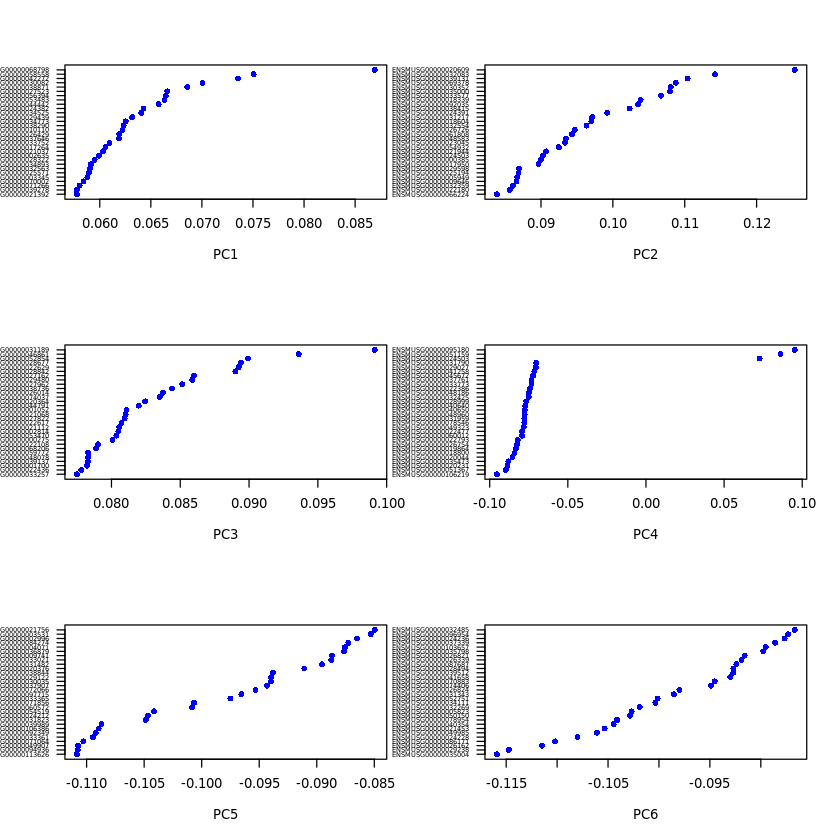

Warning message:
“Removed 23987 rows containing missing values (geom_point).”

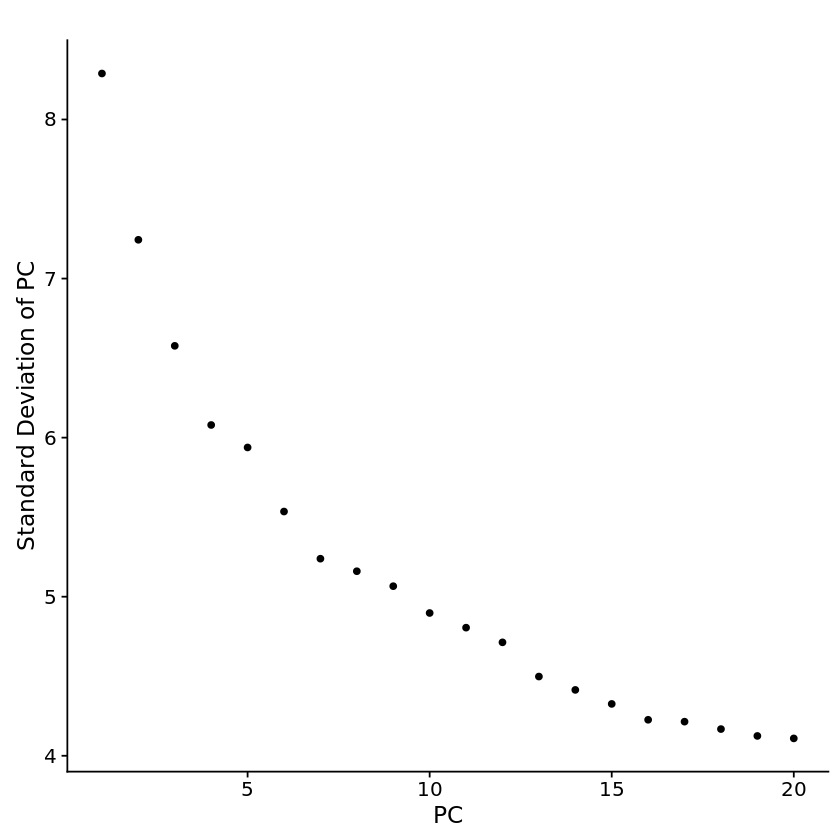

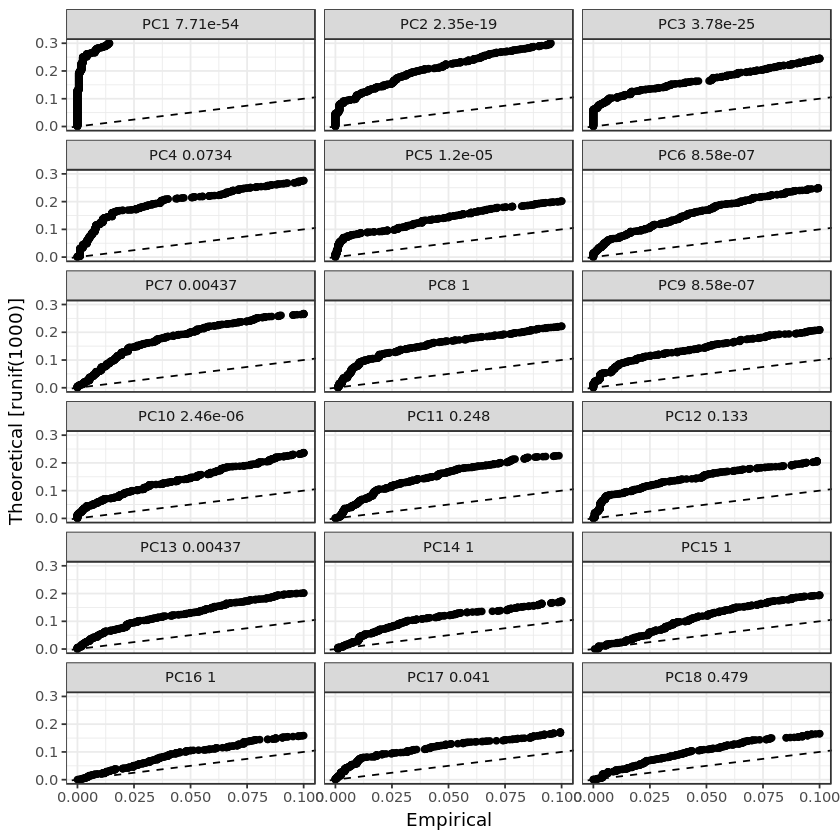

In [28]:
library(dplyr)

genes_of_interest <- c(
    "Eomes", "Brachyury", "Mesp1",                # meso
    "Pou5f1", "nanog",                            # pluripotent
    "Sox1", "Sox2", "Pou3f1", "zfp462", "slc7a3"  # neuroectoderm
)

seu <- RunPCA(
    object = seu, 
    pc.genes = seu@var.genes, 
    do.print = FALSE, 
    pcs.print = 1:6, 
    genes.print = 5
)

VizPCA(object = seu, pcs.use = 1:6)
PCElbowPlot(object = seu)
seu <- JackStraw(
    object = seu, 
    num.replicate = 100, 
    do.print = FALSE
)
JackStrawPlot(object = seu, PCs = 1:18)

In [47]:
PCAPlot(object = seu, dim.1 = 1, dim.2 = 3, 
        cols.use = list(1 = 256,2 = 2,3 = 3, 4 = 4))

#str(seu)



ERROR: Error in parse(text = x, srcfile = src): <text>:2:27: unexpected '='
1: PCAPlot(object = seu, dim.1 = 1, dim.2 = 3, 
2:         cols.use = list(1 =
                             ^


In [ ]:
runTSNEDetector <- function(data, dims){
    clust2 <- RunTSNE(
        object = data,
        dims.use = dims,
        do.fast = TRUE,
        seed.use = 1
    )
    clust2 <- FindClusters(
        object = clust2, 
        reduction.type = "tsne",   # tsne, 1:2, yields 4
        dims.use = 1:2,            # 1:10 yields 4
        resolution = 1.0, 
        print.output = 0,
        save.SNN = TRUE,
        temp.file = "/extra/"
    )
    #PrintFindClustersParams(object = seu.clust2)
    table(clust2@ident)

    markers <- FindAllMarkers(
        object = clust2, 
        only.pos = TRUE, 
        min.pct = 0.25, 
        thresh.use = 0.25
    )

    top20 <- markers %>% group_by(cluster) %>% top_n(20, avg_logFC)

    include_genes <- unique(append(
        top20$gene, genes_of_interest
    ))

    DoHeatmap(
        object = clust2, 
        genes.use = include_genes, 
        slim.col.label = FALSE, 
        remove.key = TRUE,
        cex.row = 5,
        cex.col = 2    
    )
}

runTSNEDetector(seu, c(1,2))
runTSNEDetector(seu, c(2,3))
runTSNEDetector(seu, 1:3)